# Actividad Guiada 2 (Extr): DengAI. Predicting Disease Spread - Predicción

### __Nombre:__ Daniel Portugal Revilla



__Objetivos:__ Predicción sobre los casos de dengue en una semana a partir de los datos metereológicos de la misma. La competición mide el error cometido en la predicción.

__Técnica a utilizar:__ Técnicas de predicción de las vistas en la asignatura.

__Tecnología:__ Libre, debe justificarse en la memoria a entregar.

__Entregable:__ Los alumnos realizarán una memoria (límite 10 páginas) describiendo lo siguiente: el problema afrontado, las técnicas utilizadas y su parametrización y los resultados obtenidos incluyendo el usuario de DrivenData utilizado para obtenerlo. Esta memoria contendrá explicaciones sobre los códigos desarrollados.

### Introducción y definición del problema
La competición le reta a predecir el número de casos de dengue que se notifican cada semana en San Juan (Puerto Rico) e Iquitos (Perú) utilizando los datos ambientales recogidos por diversos organismos del Gobierno Federal de los Estados Unidos. Los datos proporcionados tienen características como la temperatura, la humedad y la precipitación máximas semanales.
El aumento de las precipitaciones también debería contribuir al aumento de los mosquitos y, por lo tanto casos de fiebre del dengue. Con una gran cantidad de datos climáticos y otros factores, vamos a calcular los grandes contribuyentes y predecir los resultados de los datos proporcionados más adelante.


 ### Descripción de los datos
1. 3 conjuntos de datos proporcionados por Driven Data
2.22 características:
- City, year, weekofyear,.....
- Los datos climáticos son los más comunes, es posible eliminar las características correlacionadas

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error



In [26]:
train = pd.read_csv('./Data/dengue_features_train.csv', encoding='utf-8')
test = pd.read_csv('./Data/dengue_features_test.csv', encoding='utf-8')
labels = pd.read_csv('./Data/dengue_labels_train.csv', encoding='utf-8')



In [3]:
dfJoined = pd.merge(train, labels, left_index=True, right_index=True,on=['city','year','weekofyear'])

In [4]:
dfJoined.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


### Correlación de  variables

visualizamos la correlacion entre variables y con la variable destino  __"total_cases"__

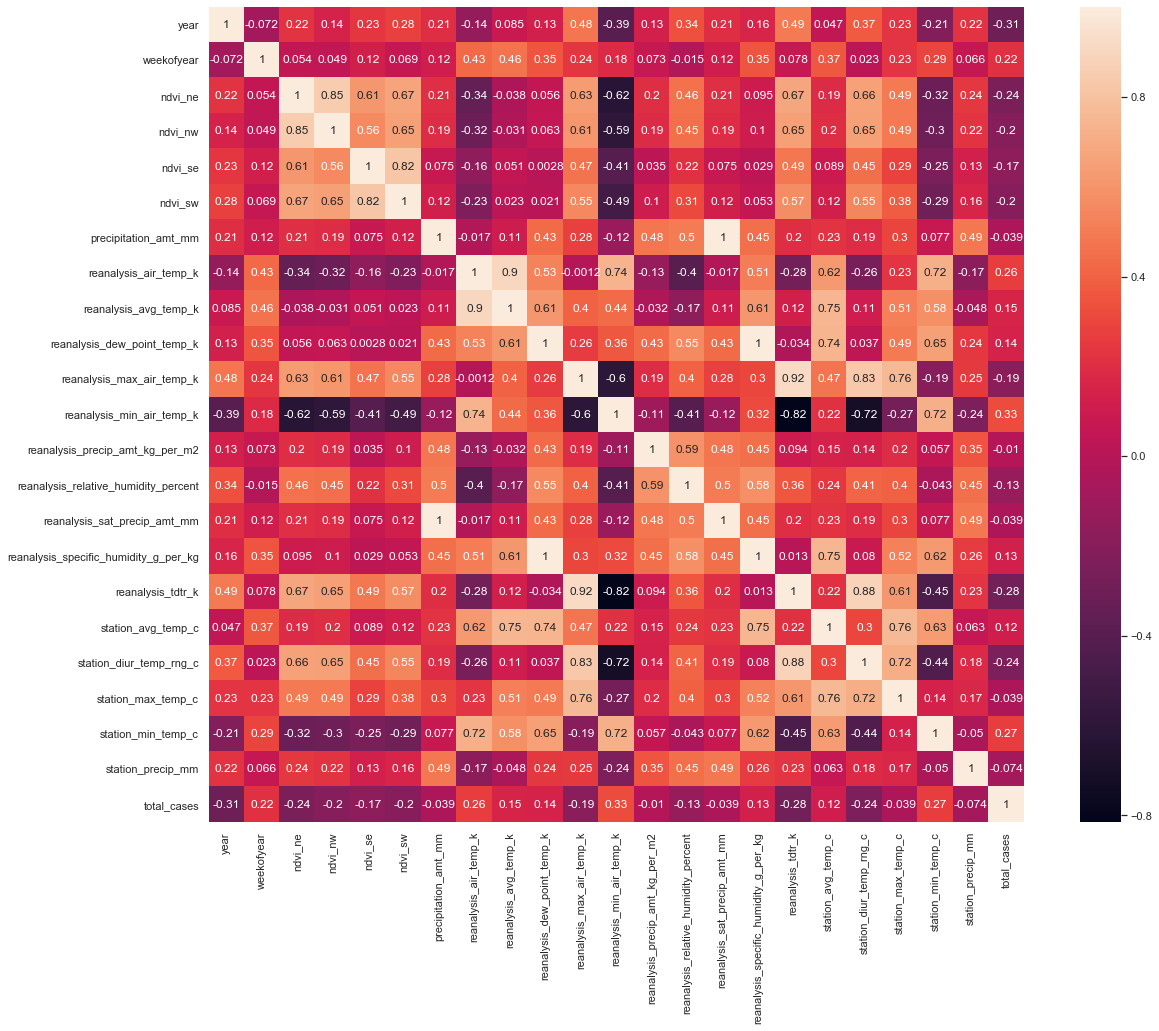

In [5]:

sns.set()
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(dfJoined.corr(), square=True, annot=True,ax=ax)


In [7]:
sns.heatmap(df_iq.corr(), cmap='RdBu')
plt.title('Iquitos Variable Correlations')

NameError: name 'df_iq' is not defined

In [8]:
sns.heatmap(df_sj.corr(), cmap='RdBu')
plt.title('San Juan Variable Correlations')

NameError: name 'df_sj' is not defined


Los dos mapas de calor de abajo describen la correlación interna del conjunto de datos para ambas ciudades. Mayor Las correlaciones de los datos implican principalmente datos climáticos. Para los datos de San Juan, la prominente Los ejemplos son los registros de datos relacionados con la temperatura. Esto tiene sentido ya que el clima de la ciudad varían muy poco. Donde los datos tienden a no correlacionarse es con la ubicación y la humedad. Los mismos resultados pueden decirse para Iquitos. Sin embargo, los datos de localización de Iquitos están mucho más correlacionados, pero la correlación para los datos climáticos es más concentrada y dispersa. La implicación para ambos es que algunos de los datos climáticos pueden ser eliminados ya que hay una baja variabilidad en ellos.


In [86]:
#  features and labels

df = dfJoined[['reanalysis_min_air_temp_k', 'station_min_temp_c','reanalysis_air_temp_k','weekofyear','year','reanalysis_tdtr_k','station_diur_temp_rng_c','ndvi_ne', 'total_cases']]
df.reset_index(drop = True, inplace = True)
df['NanInRowCount']=df.isnull().sum(axis=1)
df = df.drop(df[df.NanInRowCount > 10].index)
df = df.drop(['NanInRowCount'], axis=1) 
df = df.interpolate(method ='linear', axis=0)

In [87]:
df.head()

,reanalysis_min_air_temp_k,station_min_temp_c,reanalysis_air_temp_k,weekofyear,year,reanalysis_tdtr_k,station_diur_temp_rng_c,ndvi_ne,total_cases
0,295.9,20.0,297.572857,18,1990,2.628571,6.900000,0.122600,4
1,296.4,22.2,298.211429,19,1990,2.371429,6.371429,0.169900,5
2,297.3,22.8,298.781429,20,1990,2.300000,6.485714,0.032250,4
3,297.0,23.3,298.987143,21,1990,2.428571,6.771429,0.128633,3
4,297.5,23.9,299.518571,22,1990,3.014286,9.371429,0.196200,6


Min Value uniform : 18.647660971120484 (29)
Min Value distance : 18.732329050810137 (29)


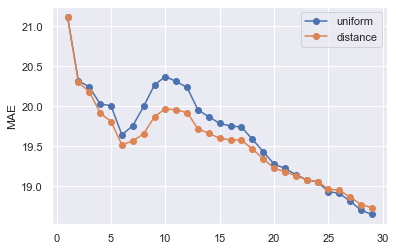

In [88]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False) # 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(df):
          # División train test aleatoria
          f_train = df.loc[train_fold]
          f_test = df.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['total_cases'], axis=1), 
                               y = f_train['total_cases'])
          y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['total_cases'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [89]:
#partiendo el dataset en dos, por ciudades (San Juan e Iquitos)
df_sj = dfJoined.loc[dfJoined['city'] == 'sj']
df_iq = dfJoined.loc[dfJoined['city'] == 'iq']

df_sj = df_sj.drop(labels=['city'],axis=1)
df_iq = df_iq.drop(labels=['city'],axis=1)

df_iq.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


## Random Forests
Nos decidimos por esta técnica para aprender más sobre los árboles de decisión. Sklearn proporciona una excelente biblioteca para aprender sobre Random foresting. También es una herramienta útil para aprender sobre el análisis y la comparación de características.

In [9]:
train_target = labels['total_cases']
test_city = test['city']
test_year = test['year']
test_weekofyear = test['weekofyear']

In [10]:
df = train.append(test, ignore_index = True)

In [11]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [12]:
cats = []
for col in df.columns.values:
    if df[col].dtype == 'object':
        cats.append(col)
df_cat = df[cats]
df_cont = df.drop(cats, axis=1)


valores medios sustituidos por valores nulos/perdidos

In [13]:
for col in df_cont.columns.values:
    df_cont[col] = df_cont[col].fillna(df[col].median())

week_start_date no es necesaria ya que las variables de week y year ya están disponibles

In [14]:

df_cat = df_cat.drop(['week_start_date'], axis = 1)


In [15]:
df_cat = pd.get_dummies(df_cat)

df = df_cont.join(df_cat)

In [16]:
train = df.iloc[0:train.shape[0]]
test = df.iloc[train.shape[0]:]
    
scorer = make_scorer(mean_absolute_error, False)

In [17]:
scorer

make_scorer(mean_absolute_error, greater_is_better=False)

__RandomForestRegressor__

In [18]:
randForestModel = RandomForestRegressor(n_estimators=100, random_state=8)
crossValMean = np.sqrt(-cross_val_score(estimator=randForestModel, 
                                        X=train, y=np.ravel(train_target), cv=10, scoring = scorer)).mean()
crossValSTD = np.sqrt(-cross_val_score(estimator=randForestModel, 
                                       X=train, y=np.ravel(train_target), cv=10, scoring = scorer)).std()


In [19]:
randForestModel.fit(train, np.ravel(train_target))
predictions = randForestModel.predict(test)
predictions = predictions.astype(int)

submission = pd.DataFrame(predictions, columns=["total_cases"])

In [20]:
submission.insert(0, 'city', test_city)
submission.insert(1, 'year', test_year)
submission.insert(2, 'weekofyear', test_weekofyear)

submission.reset_index()

Exportamos a un formato csv los datos de salida para poder enviarlos a ser evaluados en la competición 

In [ ]:
submission.to_csv('AG02_V1_RandomForestRegressor.csv', index = False)

<img src="https://i.ibb.co/mBpNT6q/Random-Forest-Regressor.png">

## Prophet

A principios de 2017 Facebook abrió Prophet, una herramienta de predicción disponible en Python y R. Prophet es particularmente buena para pronosticar series temporales con una fuerte estacionalidad, cambios de tendencias históricas y tendencias que siguen curvas de crecimiento no lineales. Otras buenas razones para utilizar Prophet son la excelente documentación proporcionada y la facilidad general de uso.

In [23]:
#importar Prophet
from fbprophet import Prophet

In [28]:
train.head()
test.head()
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Ya que vamos a tratar de hacer predicciones basadas puramente en datos de tiempo, podemos cortar __city__, __weekofyear__ y __total_cases__ de nuestros  datos. 

In [27]:
train['total_cases'] = labels['total_cases']
prophet_data = train[['city', 'week_start_date', 'total_cases']]


In [122]:
prophet_data_sj = prophet_data[prophet_data['city'] == 'sj'].drop('city', axis=1)
prophet_data_iq = prophet_data[prophet_data['city'] == 'iq'].drop('city', axis=1)

test_sj = test[test['city'] == 'sj']['week_start_date']
test_iq = test[test['city'] == 'iq']['week_start_date']

Para que Prophet funcione correctamente, es obligatorio nombrar la característica de tiempo ds y los valores para predecir __y__ . Hágalo para ambos dataframes.

In [123]:
prophet_data_sj.columns, prophet_data_iq.columns = ['ds', 'y'], ['ds', 'y']

### Prophet magic

Podemos empezar a usar la librería de fbprophet para pronosticar los valores de nuestros datos de prueba. Para mayor comodidad, crearemos una función que tome los datos del tren, los datos de prueba y dos parámetros de previsión como entrada.
El primer paso para establecer una predicción de Prophet es crear una nueva instancia de la clase Prophet. Se puede establecer un montón de parámetros (por ejemplo, estacionalidad_semanal o estacionalidad_diaria) durante la iniciación de esta clase, pero sólo estableceremos la escala_previa_de_puntos_de_cambio (por defecto 0,05) y la estacionalidad_anual (por defecto 10)

In [125]:
def create_forecast(train_data, test_data, flex, seas):
    
    prophet = Prophet(changepoint_prior_scale=flex,yearly_seasonality=seas) 
    
    prophet.fit(train_data)
    
    future_frame = prophet.make_future_dataframe(
        periods=len(test_data), 
        freq='W')
    
    forecast = prophet.predict(future_frame)
    prophet.plot(forecast)
    forecast = forecast[['ds', 'yhat']].yhat.apply(lambda x : int(x))
    
    return forecast[len(train_data):]

Haz dos pronósticos, uno para Iquitos y otro para San José, y guárdalos en una variable. Aquí, usamos el valor por defecto para la estacionalidad (10) y la flexibilidad (0.05).

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


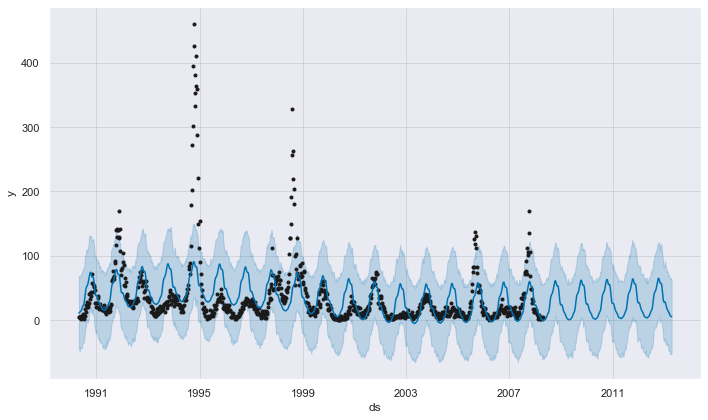

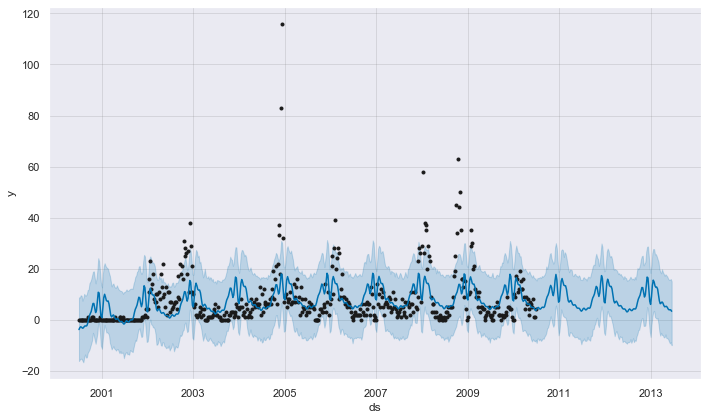

In [127]:
forecast_sj = create_forecast(prophet_data_sj, test_sj, 0.05, 10)
forecast_iq = create_forecast(prophet_data_iq, test_iq, 0.05, 10)

Mirando los pronósticos, podemos ver que de hecho creamos dos series de pandas con predicciones para nuestros datos de prueba. Junto con la serie, también debería aparecer un gráfico con los datos originales dispersos y las predicciones como una línea continua.

In [128]:
def create_submission(forecast_sj, forecast_iq, sub_name):
    test_index = test[['city', 'year', 'weekofyear']]
    output = pd.concat([forecast_sj, forecast_iq]).reset_index().drop(['index'], axis=1)
    output.columns = ['total_cases']
    pd.concat([test_index, output], axis=1).set_index(['city']).to_csv(sub_name + '.csv')
    

Exportamos a un formato csv los datos de salida para poder enviarlos a ser evaluados en la competición 

In [ ]:
create_submission(forecast_sj, forecast_iq, 'AG02_V2_prophet')

<img src=https://i.ibb.co/d6H52kP/Prophet.png>
